This notebook is used for analyse stock price of Deutsche Bank for EQUITY NYQ, GER and FRA and to predict the close price of EQUITY - NYQ.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from IPython.display import display_html

In [2]:
df = pd.read_csv('../input/deutsche-bank-equity-nyq-ger-and-fra-from-2010/DB.csv')
df_germany = pd.read_csv('../input/deutsche-bank-equity-nyq-ger-and-fra-from-2010/DBK.DE.csv')
df_france = pd.read_csv('../input/deutsche-bank-equity-nyq-ger-and-fra-from-2010/DBK.F.csv')
display_html(f"<h3><br/>Equity-NYQ-Last 10 days['currency USD']", raw=True)
display(df.tail(10).style.background_gradient(cmap='coolwarm'))
display_html(f"<h3><br/>Equity-GER-Last 10 days['currency Euro']", raw=True)
display(df_germany.tail(10).style.background_gradient(cmap='coolwarm'))
display_html(f"<h3><br/>Equity-FRA-Last 10 days['currency Euro']", raw=True)
display(df_france.tail(10).style.background_gradient(cmap='coolwarm'))

Equity-NYQ-Last 10 days['currency USD']

,Date,Open,High,Low,Close,Adj Close,Volume
3201,2022-09-21,8.750000,8.880000,8.590000,8.600000,8.600000,6782500
3202,2022-09-22,9.070000,9.090000,8.780000,8.870000,8.870000,8308700
3203,2022-09-23,8.570000,8.580000,8.240000,8.340000,8.340000,7853000
3204,2022-09-26,8.280000,8.340000,8.070000,8.120000,8.120000,6712600
3205,2022-09-27,7.960000,8.040000,7.620000,7.730000,7.730000,10366300
3206,2022-09-28,7.390000,7.690000,7.360000,7.660000,7.660000,9357500
3207,2022-09-29,7.340000,7.480000,7.260000,7.460000,7.460000,8306500
3208,2022-09-30,7.380000,7.530000,7.340000,7.400000,7.400000,6886100
3209,2022-10-03,7.360000,7.570000,7.250000,7.530000,7.530000,7333500
3210,2022-10-04,7.770000,8.160000,7.760000,8.140000,8.140000,9667400


Equity-GER-Last 10 days['currency Euro']

,Date,Open,High,Low,Close,Adj Close,Volume
3230,2022-09-21,8.863000,8.910000,8.712000,8.819000,8.819000,9398940
3231,2022-09-22,8.692000,9.324000,8.656000,9.033000,9.033000,16358469
3232,2022-09-23,9.040000,9.040000,8.601000,8.632000,8.632000,15245531
3233,2022-09-26,8.512000,8.648000,8.446000,8.491000,8.491000,9090399
3234,2022-09-27,8.519000,8.587000,8.128000,8.128000,8.128000,15219822
3235,2022-09-28,8.001000,8.019000,7.476000,7.854000,7.854000,24709992
3236,2022-09-29,7.776000,7.810000,7.461000,7.594000,7.594000,13505184
3237,2022-09-30,7.615000,7.734000,7.517000,7.646000,7.646000,10709219
3238,2022-10-03,7.456000,7.687000,7.249000,7.630000,7.630000,13941136
3239,2022-10-04,7.705000,8.070000,7.676000,8.070000,8.070000,12496377


Equity-FRA-Last 10 days['currency Euro']

,Date,Open,High,Low,Close,Adj Close,Volume
3228,2022-09-21,8.888000,8.898000,8.731000,8.731000,8.731000,26240
3229,2022-09-22,8.708000,9.311000,8.668000,8.957000,8.957000,42678
3230,2022-09-23,9.029000,9.087000,8.575000,8.591000,8.591000,101767
3231,2022-09-26,8.543000,8.638000,8.430000,8.439000,8.439000,20942
3232,2022-09-27,8.559000,8.607000,7.972000,8.070000,8.070000,82494
3233,2022-09-28,8.042000,8.050000,7.480000,7.874000,7.874000,67456
3234,2022-09-29,7.880000,7.934000,7.487000,7.568000,7.568000,99046
3235,2022-09-30,7.623000,7.706000,7.504000,7.515000,7.515000,45271
3236,2022-10-03,7.650000,7.675000,7.250000,7.626000,7.626000,29150
3237,2022-10-04,7.701000,8.138000,7.692000,8.092000,8.092000,44892


# Equity-NYQ

In [3]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df.describe().style.background_gradient(cmap='copper_r'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000,3211.000000
mean,26.919999,27.173000,26.624912,26.908111,24.061490,3680371.061352
std,17.354915,17.516739,17.154403,17.347729,14.292029,3380266.579857
min,5.030000,5.680000,4.990000,5.480000,5.364974,0.000000
25%,11.955000,12.060000,11.795000,11.940000,11.615953,1581700.000000
50%,19.129999,19.230000,18.969999,19.059999,18.085533,2854600.000000
75%,41.340649,41.736641,40.849238,41.335876,36.146496,4690950.000000
max,77.519081,78.406487,77.395035,77.977097,64.499596,70176200.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3211 non-null   object 
 1   Open       3211 non-null   float64
 2   High       3211 non-null   float64
 3   Low        3211 non-null   float64
 4   Close      3211 non-null   float64
 5   Adj Close  3211 non-null   float64
 6   Volume     3211 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 175.7+ KB


None

# Equity-GER

In [4]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_germany.describe().style.background_gradient(cmap='copper_r'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_germany.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,19.385027,19.655174,19.083215,19.368611,17.424807,11888192.050309
std,10.211858,10.329666,10.073200,10.207877,8.312314,7147833.254224
min,4.868500,5.100000,4.448500,4.871000,4.768366,0.000000
25%,10.287500,10.421500,10.104500,10.236500,9.953007,7391295.250000
50%,16.239855,16.450223,15.980172,16.205702,15.331802,10117586.500000
75%,28.091511,28.419900,27.629703,28.064909,24.736946,14271240.250000
max,46.410923,47.032326,45.944874,46.900276,38.292820,111008927.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3240 non-null   object 
 1   Open       3240 non-null   float64
 2   High       3240 non-null   float64
 3   Low        3240 non-null   float64
 4   Close      3240 non-null   float64
 5   Adj Close  3240 non-null   float64
 6   Volume     3240 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 177.3+ KB


None

# Equity-FRA

In [5]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_france.describe().style.background_gradient(cmap='copper_r'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_france.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000
mean,19.376342,19.644066,19.069520,19.356390,17.430029,98467.921865
std,10.192055,10.310751,10.057378,10.186976,8.316350,94241.921051
min,4.903000,5.070000,4.468000,4.947000,4.843431,0.000000
25%,10.265000,10.451000,10.120398,10.240000,9.952412,41823.000000
50%,16.236795,16.454965,15.969966,16.228758,15.307264,69678.000000
75%,28.074829,28.472557,27.632864,28.082486,24.767758,120417.000000
max,46.261791,46.842484,45.797241,46.710861,38.567959,1113323.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3238 non-null   object 
 1   Open       3238 non-null   float64
 2   High       3238 non-null   float64
 3   Low        3238 non-null   float64
 4   Close      3238 non-null   float64
 5   Adj Close  3238 non-null   float64
 6   Volume     3238 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 177.2+ KB


None

# Plots

## Adj Close

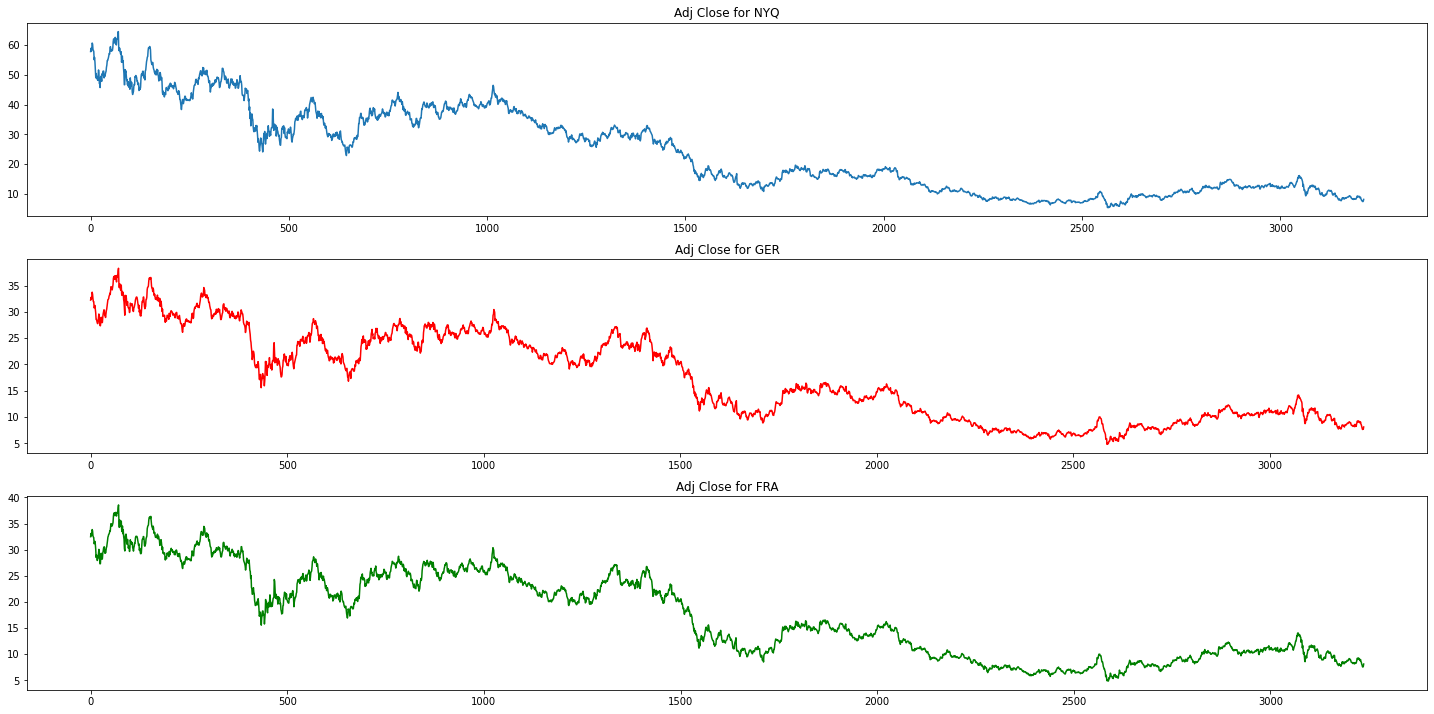

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df['Adj Close'].plot(ax=ax[0], figsize=(20,10))
ax[0].set_title('Adj Close for NYQ')
df_germany['Adj Close'].plot(ax=ax[1], figsize=(20,10), color='red')
ax[1].set_title('Adj Close for GER')
df_france['Adj Close'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Adj Close for FRA')
fig.tight_layout(pad = 1)

## Volume 

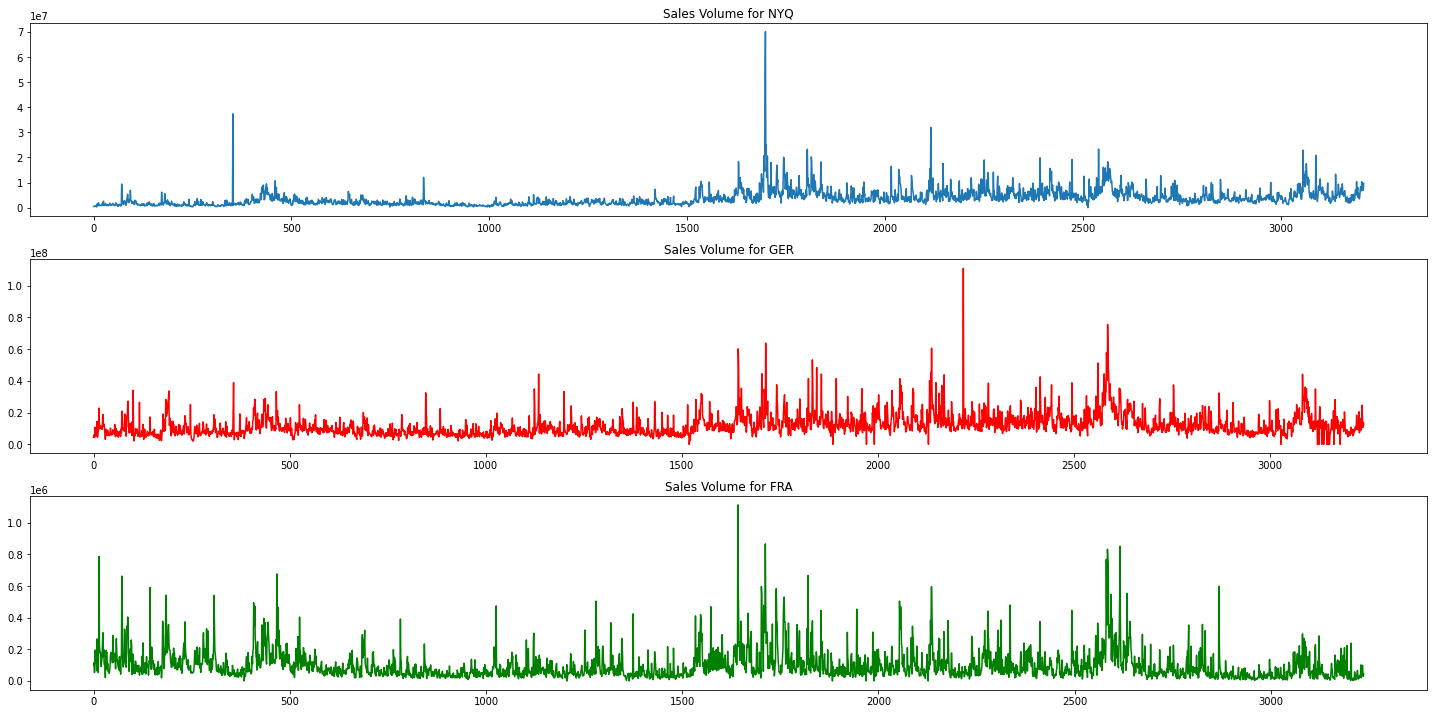

In [7]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df['Volume'].plot(ax=ax[0], figsize=(20,10))
ax[0].set_title('Sales Volume for NYQ')
df_germany['Volume'].plot(ax=ax[1], figsize=(20,10), color='red')
ax[1].set_title('Sales Volume for GER')
df_france['Volume'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Sales Volume for FRA')
fig.tight_layout(pad = 1)

# Moving Average 

In [8]:
Moving_Average = [10,30,60]

for i in Moving_Average:
    col_name = f"Moving Average for {i} days"
    df[col_name] = df['Adj Close'].rolling(i).mean()
    df_germany[col_name] = df_germany['Adj Close'].rolling(i).mean()
    df_france[col_name] = df_france['Adj Close'].rolling(i).mean()

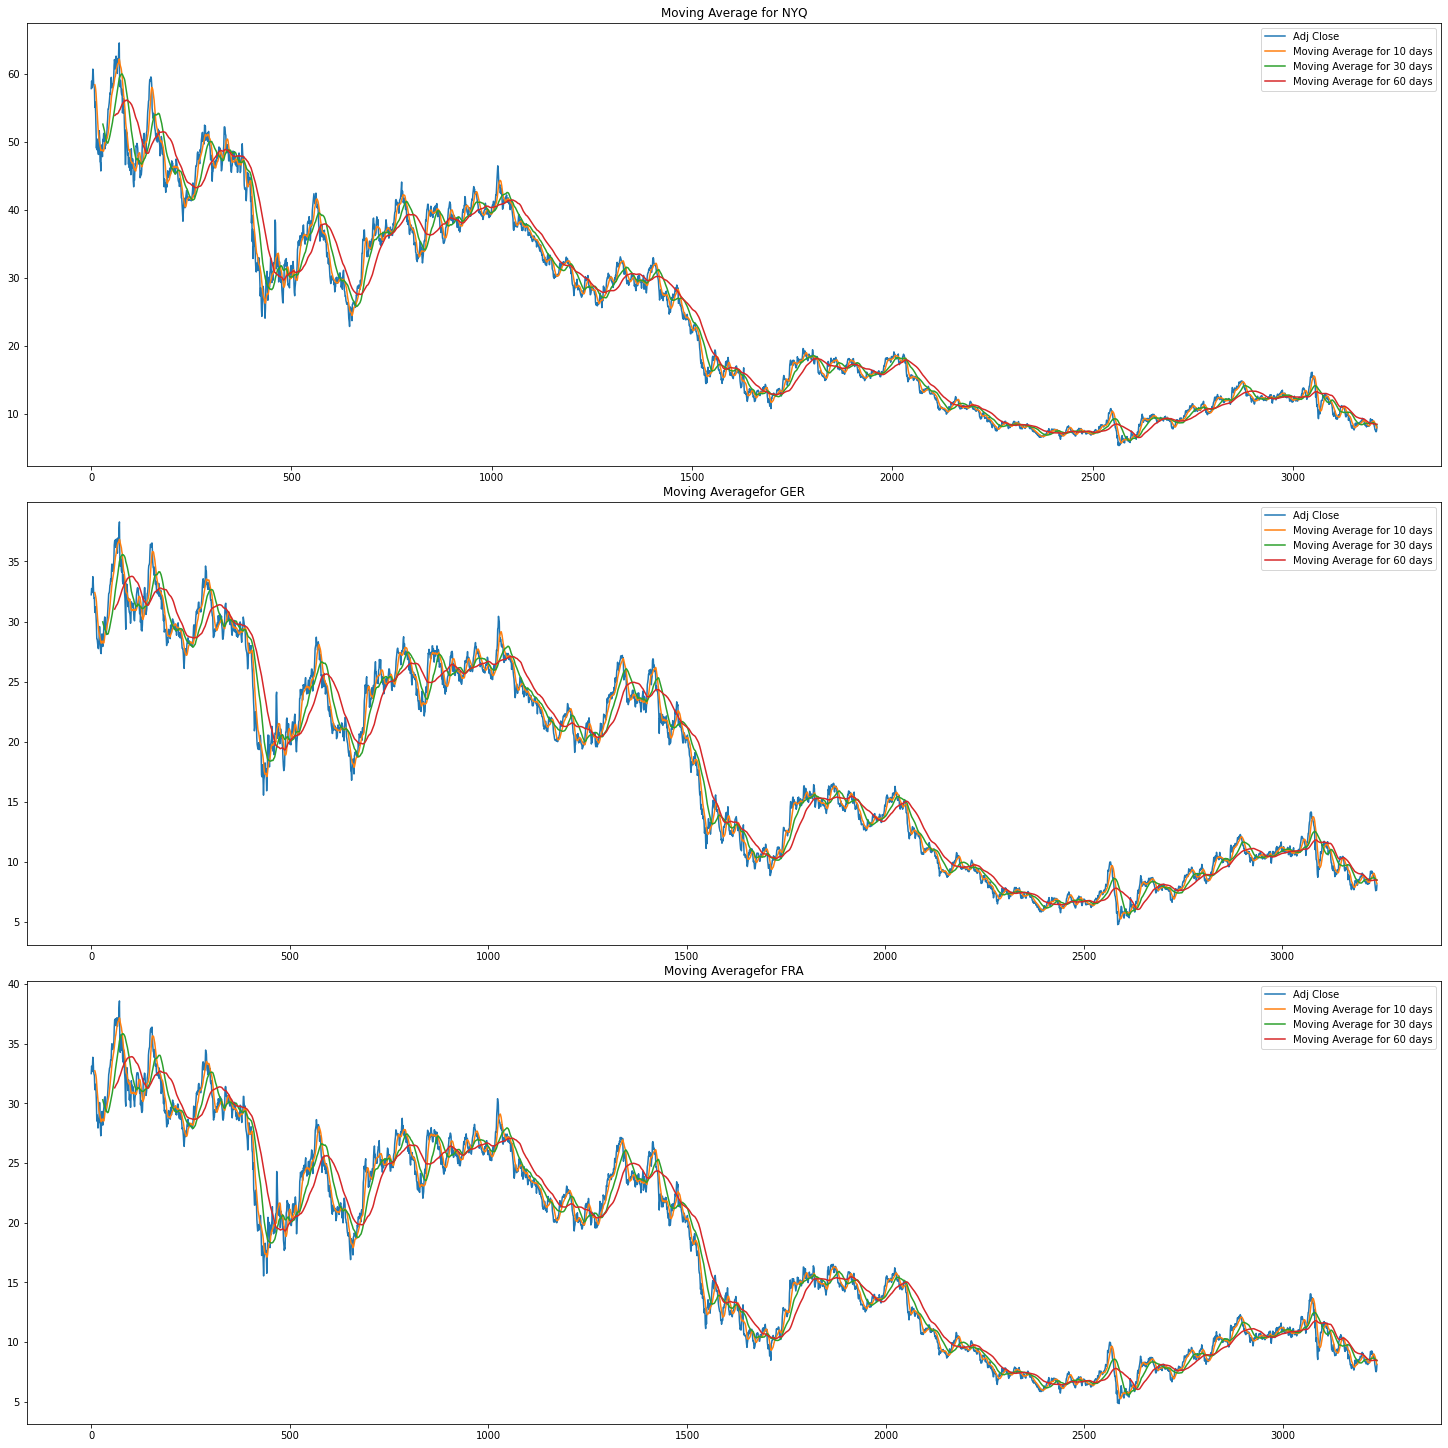

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[0],figsize=(20,20))
ax[0].set_title('Moving Average for NYQ')
df_germany[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[1],figsize=(20,20))
ax[1].set_title('Moving Averagefor GER')
df_france[['Adj Close', 'Moving Average for 10 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[2],figsize=(20,20))
ax[2].set_title('Moving Averagefor FRA')
fig.tight_layout(pad = 0.3)

# Percentage Change for each day

pct_change to find the percent change for each day

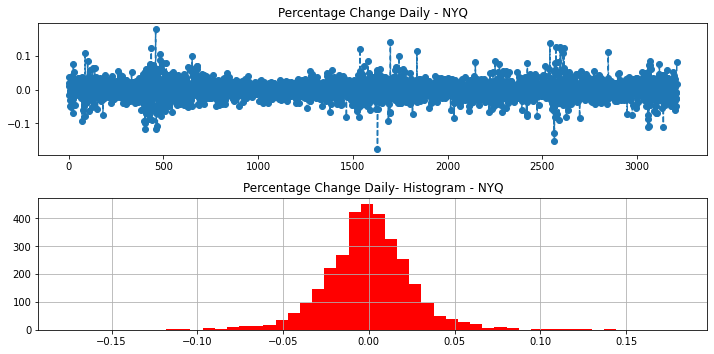

In [10]:
df['Daily Return'] = df['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o')
ax[0].set_title('Percentage Change Daily - NYQ')
df['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='red')
ax[1].set_title('Percentage Change Daily- Histogram - NYQ')

fig.tight_layout(pad = 1)

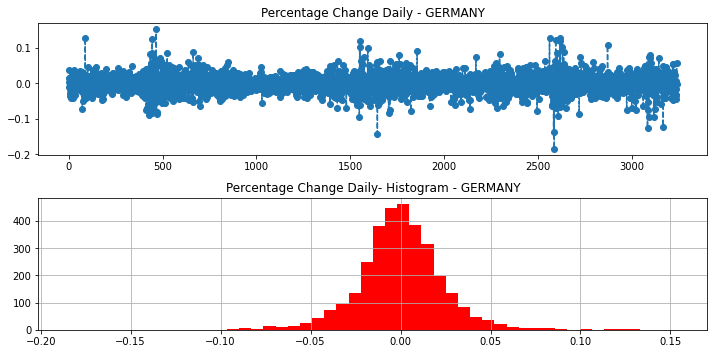

In [11]:
df_germany['Daily Return'] = df_germany['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_germany['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o')
ax[0].set_title('Percentage Change Daily - GERMANY')
df_germany['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='red')
ax[1].set_title('Percentage Change Daily- Histogram - GERMANY')

fig.tight_layout(pad = 1)

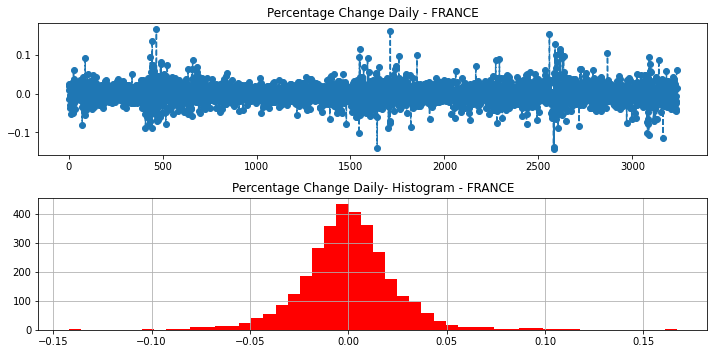

In [12]:
df_france['Daily Return'] = df_france['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_france['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o')
ax[0].set_title('Percentage Change Daily - FRANCE')
df_france['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='red')
ax[1].set_title('Percentage Change Daily- Histogram - FRANCE')

fig.tight_layout(pad = 1)

# Close Price

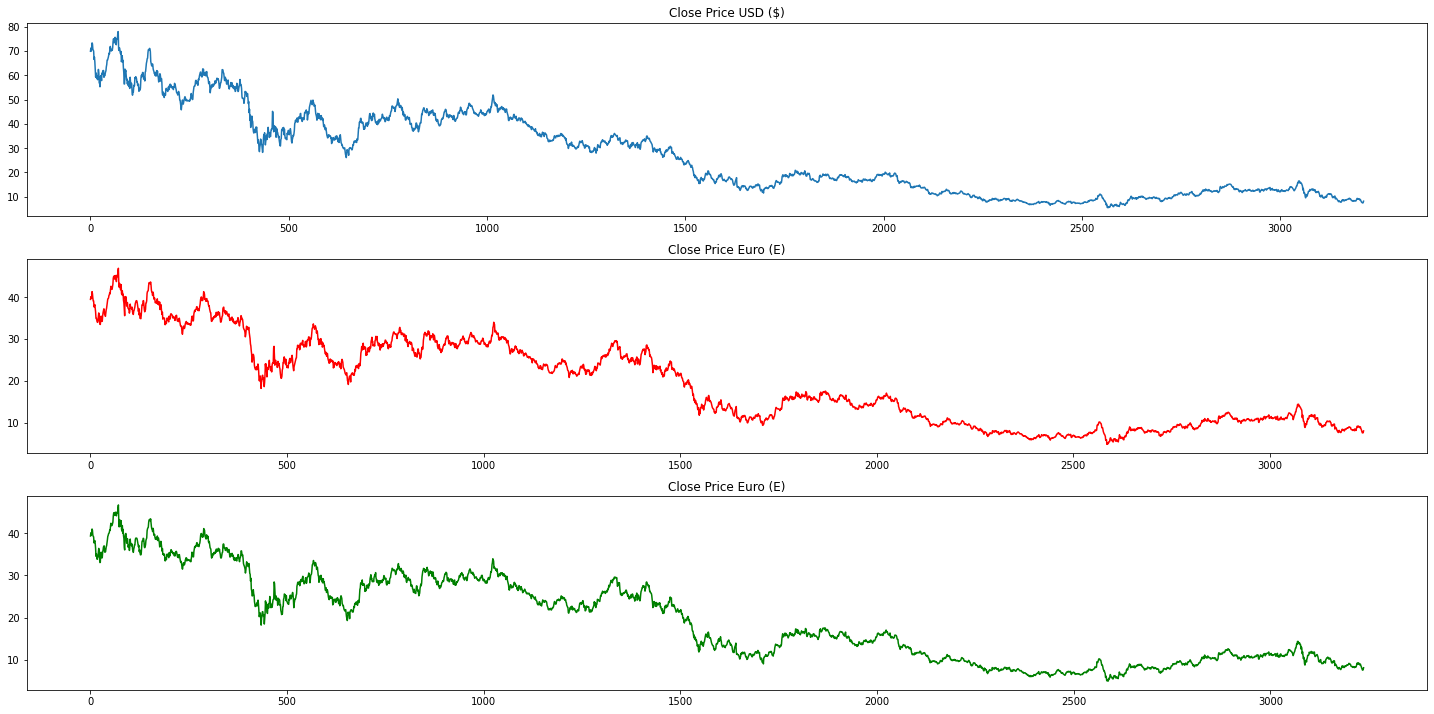

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df['Close'].plot(ax=ax[0], figsize=(20,10))
ax[0].set_title('Close Price USD ($)')
df_germany['Close'].plot(ax=ax[1], figsize=(20,10), color='red')
ax[1].set_title('Close Price Euro (E)')
df_france['Close'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Close Price Euro (E)')
fig.tight_layout(pad = 1)

# Data Scaling for EQUITY- NYQ

In [14]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len, ' is the training length')

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

3051  is the training length
[array([0.88825562, 0.90668224, 0.88970347, 0.90062783, 0.93590167,
       0.93024202, 0.89970648, 0.89444168, 0.88917697, 0.84218907,
       0.85521933, 0.828369  , 0.78783046, 0.7422903 , 0.76519198,
       0.73768365, 0.74847641, 0.73373509, 0.72689094, 0.75953237,
       0.78519805, 0.76782439, 0.70885911, 0.70806941, 0.68648394,
       0.74334325, 0.75018746, 0.73781529, 0.72162618, 0.76387583,
       0.75940077, 0.77703769, 0.77901199, 0.77861715, 0.74057925,
       0.75466252, 0.74913451, 0.76019047, 0.77085164, 0.77782739,
       0.80046587, 0.81283798, 0.83797726, 0.83771396, 0.84574272,
       0.85456118, 0.86627524, 0.87785776, 0.87443565, 0.90628739,
       0.91576401, 0.89970648, 0.88996667, 0.89062472, 0.89931164,
       0.89444168, 0.91010435, 0.94419363, 0.95932979, 0.95130104])]
[0.9361648784364429]

[array([0.88825562, 0.90668224, 0.88970347, 0.90062783, 0.93590167,
       0.93024202, 0.89970648, 0.89444168, 0.88917697, 0.84218907,
       

# Model Creation for EQUITY- NYQ

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-10-12 11:18:59.546134: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-12 11:19:00.322064: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2991/2991 [==============================] - 176s 58ms/step - loss: 0.0011


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.355543342006356

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


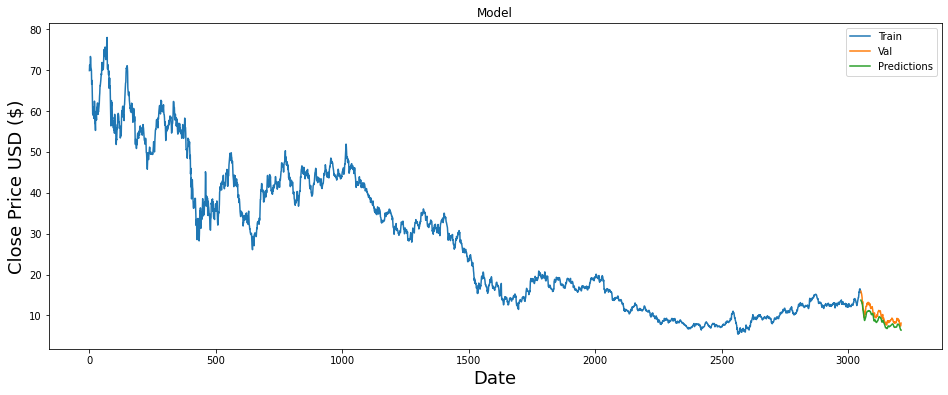

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# Close Price Prediction for EQUITY- NYQ

In [18]:
# Show the valid and predicted prices
pd.set_option('display.max_rows', None)
valid

,Close,Predictions
3051,15.95,13.748347
3052,15.77,13.617085
3053,15.45,13.533844
3054,15.31,13.411524
3055,14.86,13.284553
3056,14.36,13.078025
3057,12.77,12.774930
3058,13.44,12.087302
3059,12.43,11.677019
3060,11.36,11.227458


https://github.com/SandKrish/TimeSeries

Read more about timeseries:

https://medium.com/codex/simple-moving-average-and-exponentially-weighted-moving-average-with-pandas-57d4a457d363

https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-7e5dfa7b5f6b

https://medium.com/codex/time-series-data-decomposition-b51819f15e23
